<a href="https://colab.research.google.com/github/aminyG/PCVK_Ganjil_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

#### 3. Make an image histogram like the following histogram output based on the flowchart below : (Use image lena.jpg)

<BarContainer object of 256 artists>

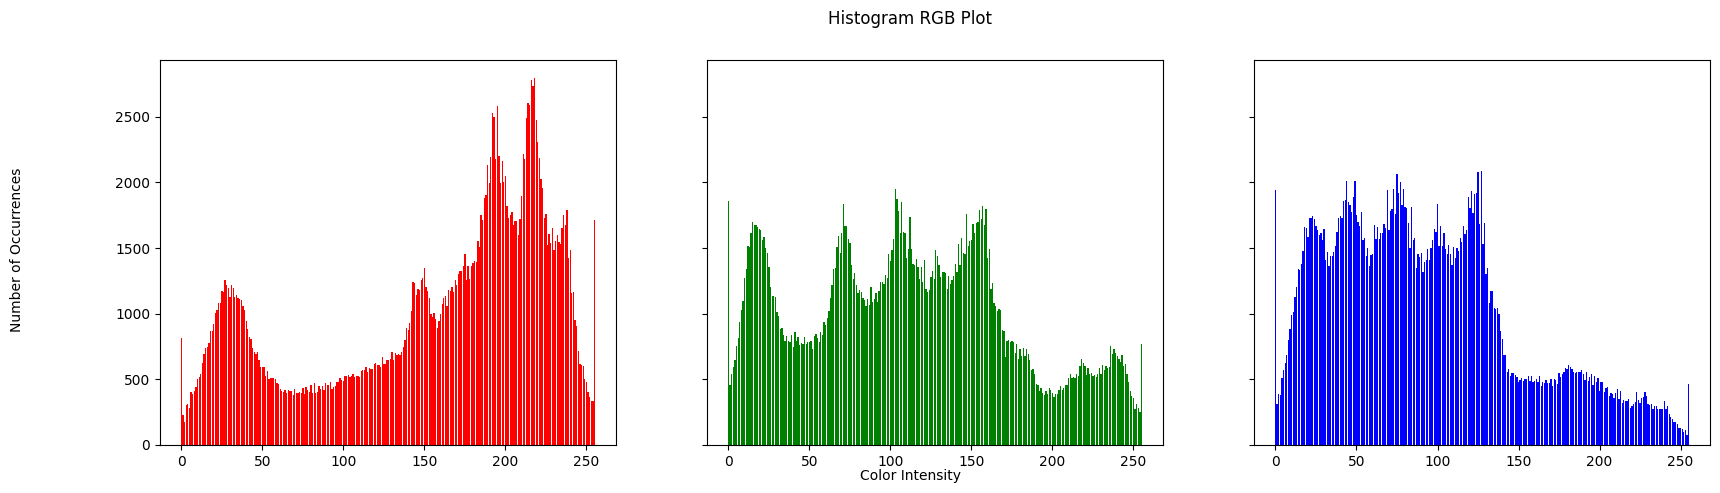

In [19]:
img = cv.imread('/content/drive/MyDrive/pcvk/photo/lena.jpg')
height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0, width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot')
fig.text(0.05, 0.5, 'Number of Occurrences', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Color Intensity', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

#### 4. After working on question no. 3, make the same image histogram but use the library that is owned by NumPy, namely " histogram ". Compare the results. Does the output appear the same?

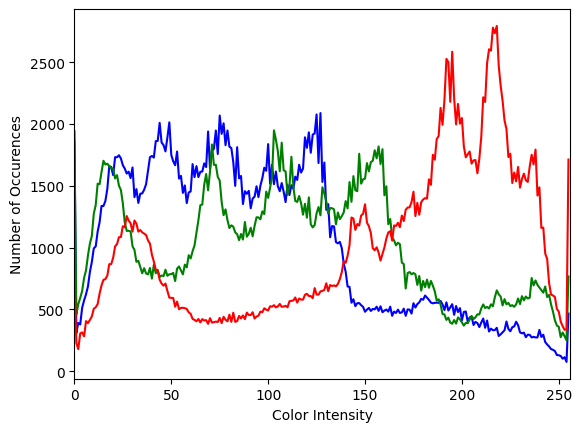

In [20]:
colors = ("b", "g", "r")
channel_ids = (0,1,2)

plt.xlim([0,256])
for channel_id, c in zip(channel_ids, colors):
  histogram, bin_edges = np.histogram(
      img[:,:, channel_id], bins=256, range=(0,256)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color Intensity")
plt.ylabel("Number of Occurences")

plt.show()